# **➼ Enrique Andres Rojas Alvarez**

In [ ]:
#########################################################################################################################################################################################################################################################################
#Librerias
#########################################################################################################################################################################################################################################################################
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
import glob
from numpy import *
from skimage.transform import radon, rescale, iradon, iradon_sart,rotate
from matplotlib import animation
from IPython.display import HTML
from scipy.signal import hilbert, chirp
#########################################################################################################################################################################################################################################################################


## **➼ Codigo Preguna N°1**

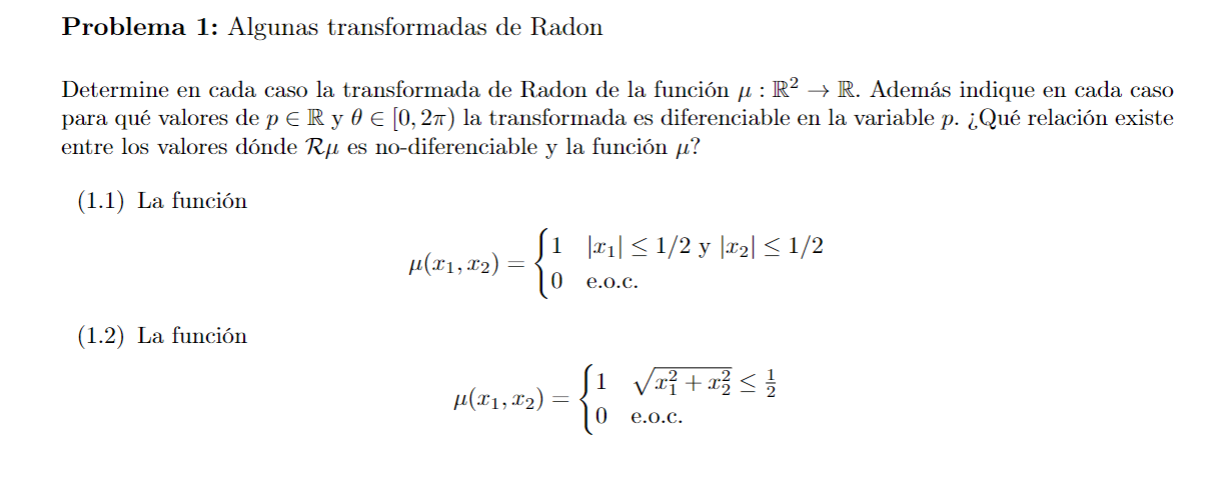

###**1.1**

#### En  primer lugar debemos comprender que la Trans.Radon lo que hace es calcular las proyeciones de una matriz de imagen a a lo largo de direcciones especificas. 

#### Esto se logra mediante la proyeccion de una funcion bidimensional f(x,y) la cual es un conjunto de integrales de linea. Lo que se jace es calcilar las integrales de linea de multiples fuentes a lo largo de caminos paralelos en una direccion determinada, separados por 1 pixel uno de el otro. 

####Luego para recontruir la imagen lo que se ace es tomar las multiples proyecciones paralelas de la iamgen desde diferentes anggulos girando la fuente al rededor del centro de la imagen,


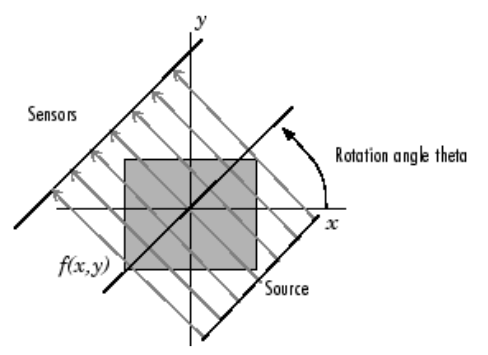

#### Aqui podemos evidenciar como la integral de línea de f(x,y) en la dirección vertical es la proyección de f(x,y) sobre el eje x mientras que la integral de línea en dirección horizontal es la proyección de f(x,y) sobre el eje y.

#### Entonces para resolver aplicamos que 

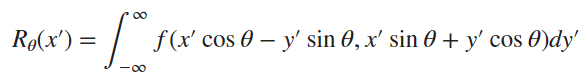

#### Donde:

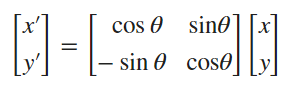

####Resultando de esta forma: 
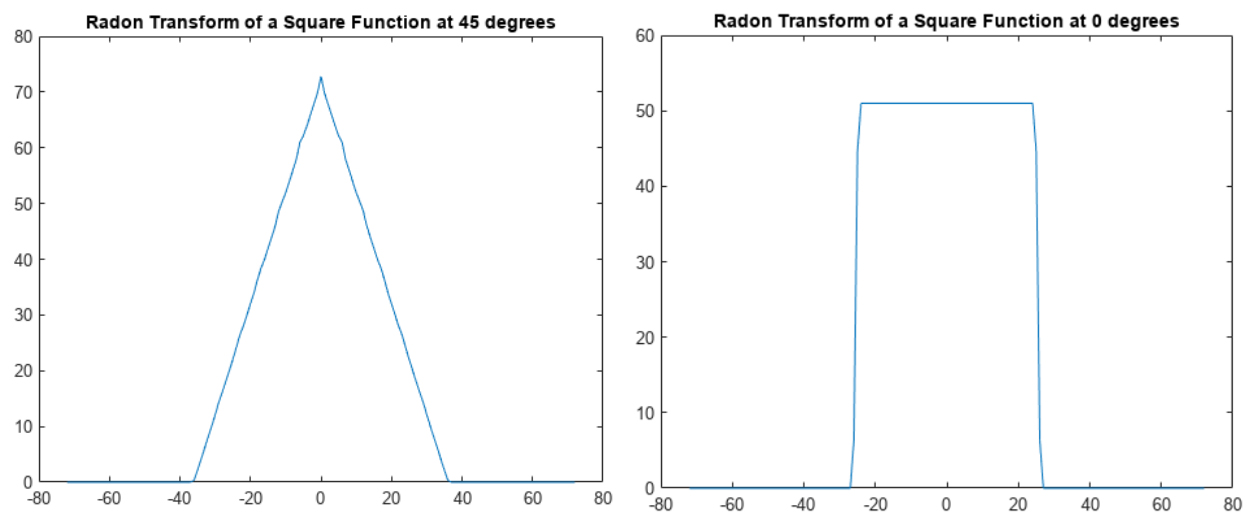



####Para resolverlo matematicamanete tenemos que considerar el sigueinte sistema:
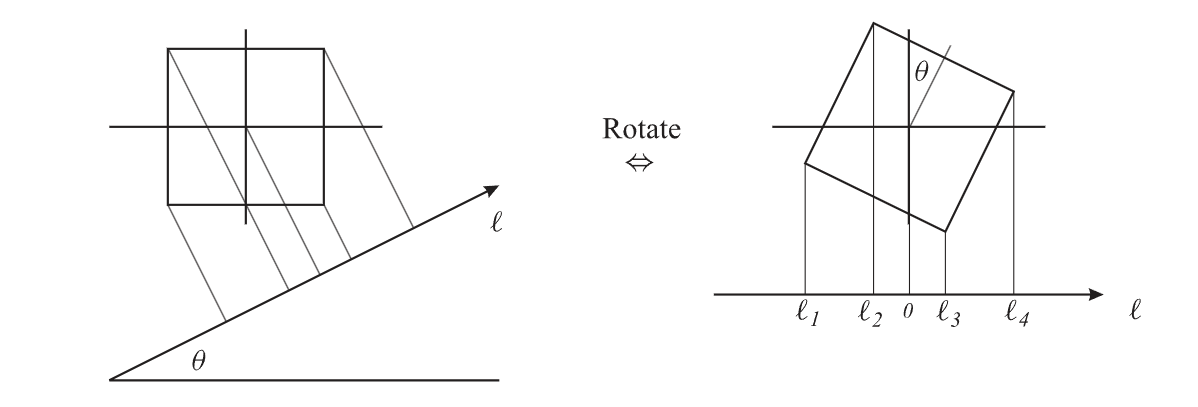

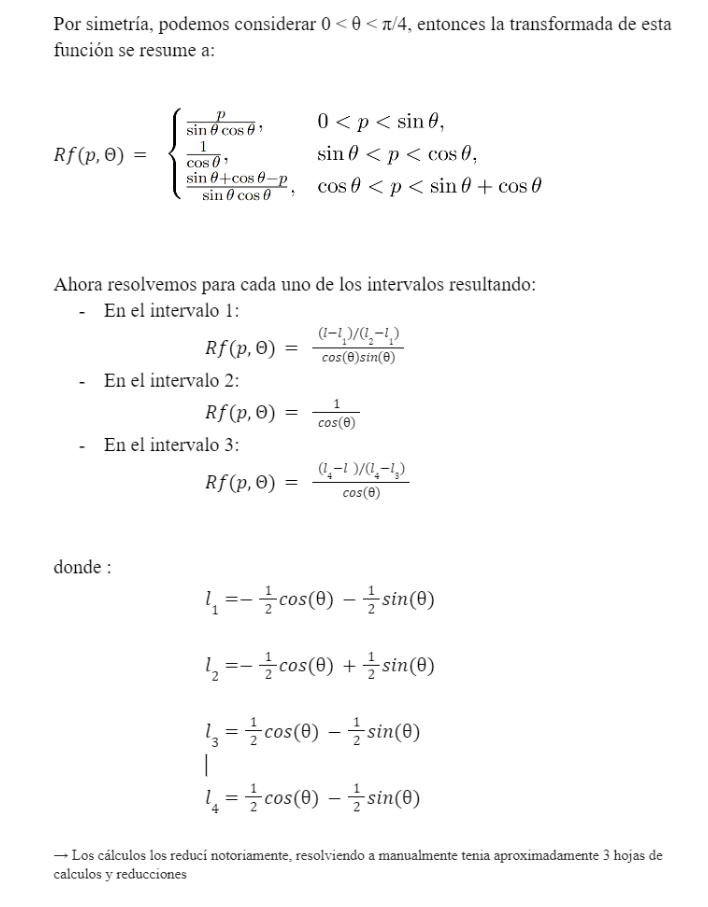

#### De esta manera podemos ver que la proyeccion de la digura resulta en.


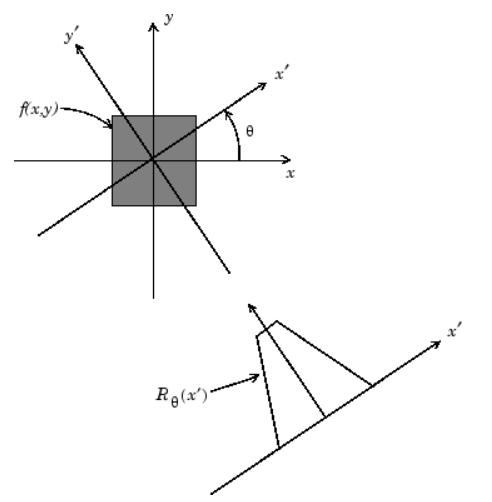

####Analisandolo mediante codigo resulta:

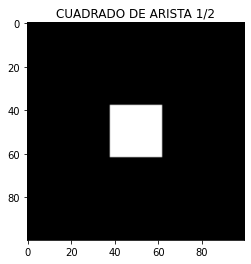

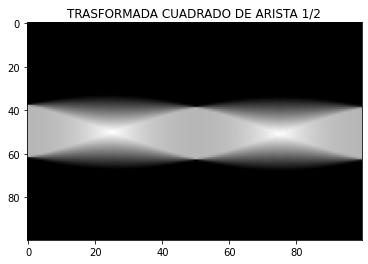

In [ ]:

# creamos una grilla con valores de x e y
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

xx, yy = np.meshgrid(x, y)

def cuadrado(x, y, r):
    return 1*(abs(x) < 1/2) & 1*(abs(y) < 1/2)

s = cuadrado(xx, yy, 1)

plt.imshow(s, cmap='gray')
#########################################################################################################################################################################################################################################################################
#Grafico 1
#########################################################################################################################################################################################################################################################################
plt.imshow(s, cmap='gray')
plt.title(f"CUADRADO DE ARISTA 1/2")
plt.show()
#########################################################################################################################################################################################################################################################################
#Grafico 2
#########################################################################################################################################################################################################################################################################
theta = np.linspace(0., 180., 100, endpoint=False)
sinogram = radon(s, theta=theta, preserve_range=True)
plt.imshow(sinogram, cmap='gray',aspect="auto")
plt.title(f"TRASFORMADA CUADRADO DE ARISTA 1/2")
plt.show()

###**1.2**

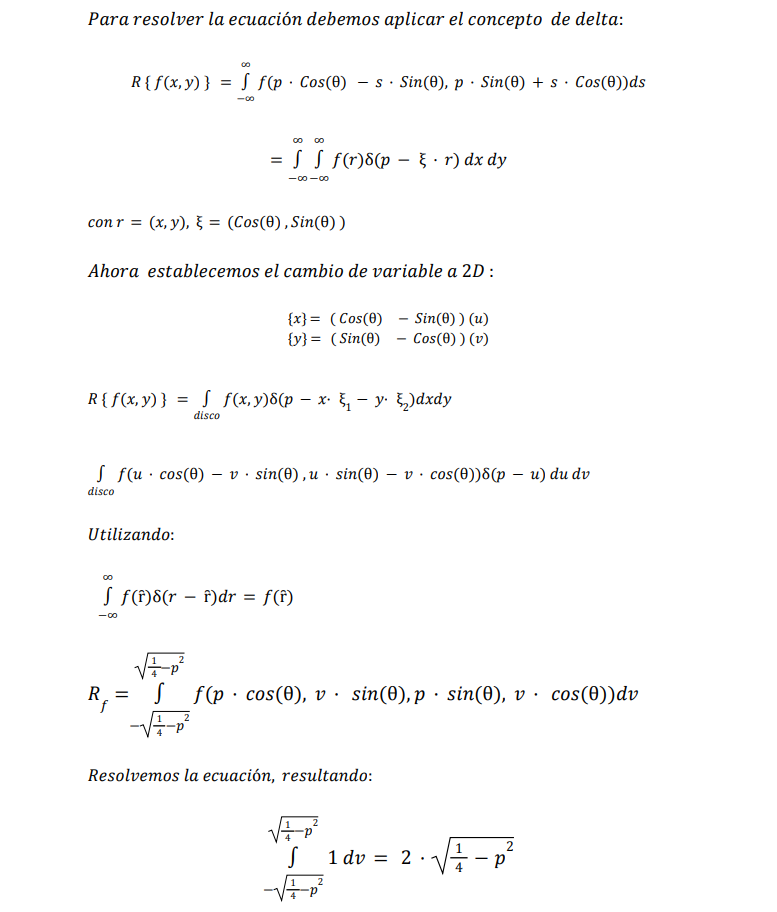

#### A continuacion se presenta como es el analisis grafico de la funcion 

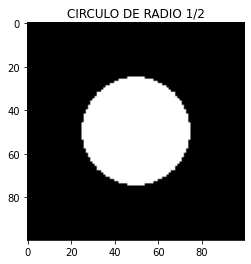

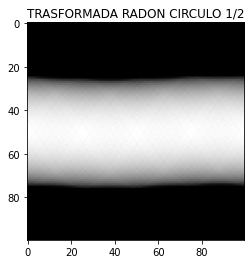

In [ ]:
# creamos una grilla con valores de x e y
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

xx, yy = np.meshgrid(x, y)

def sphere(x, y, r):
    return 1*(x**2 + y**2 < 1)

s = sphere(xx, yy, 1)

plt.imshow(s, cmap='gray')
plt.title(f"CIRCULO DE RADIO 1/2")
plt.show()
theta = np.linspace(0., 360., 100, endpoint=False)
sinogram = radon(s, theta=theta, preserve_range=True)
plt.imshow(sinogram, cmap='gray')
plt.title(f"TRASFORMADA RADON CIRCULO 1/2")
plt.show()


#### Es en respuesta a la relacion entre μ y Rμ que se plantea la sigueinte cita:

"*Como podemos ver la transformada de radón es la transformada integral que lleva una función μ definida en el plano a una función Rμ definida en el espacio (bidimensional) de líneas en el plano, cuyo valor en una línea en particular es igual a la integral de línea de la función sobre esa línea*"


* Cita de:https://hmong.es/wiki/Radon_transform


## **➼ Codigo Preguna N°2**

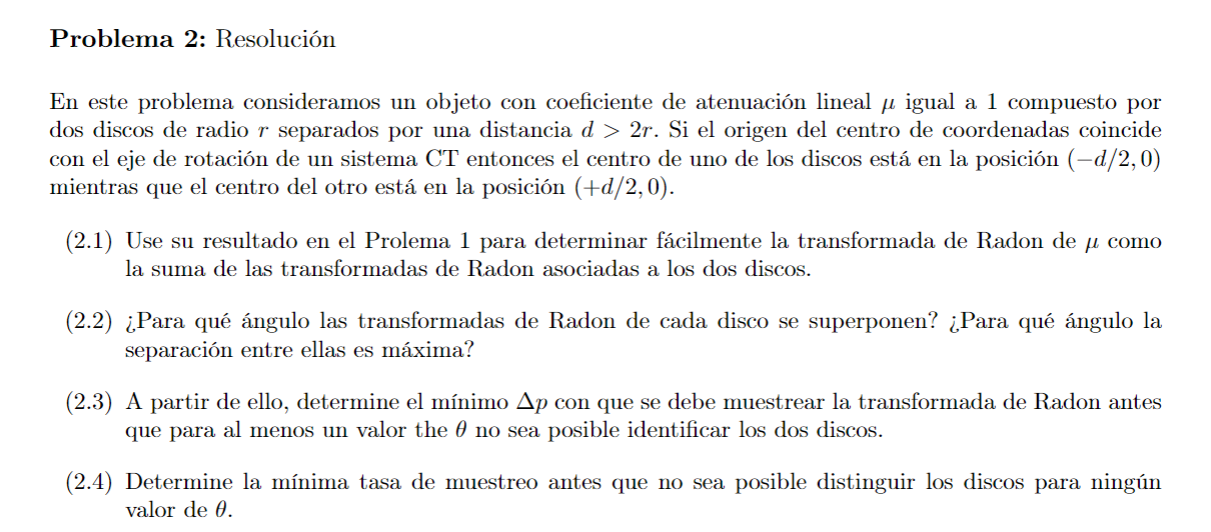



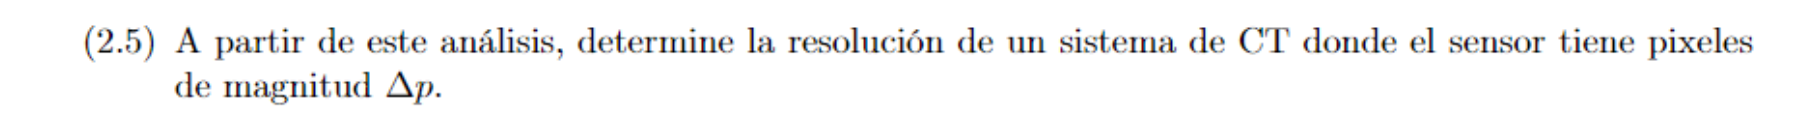

###**2.1**

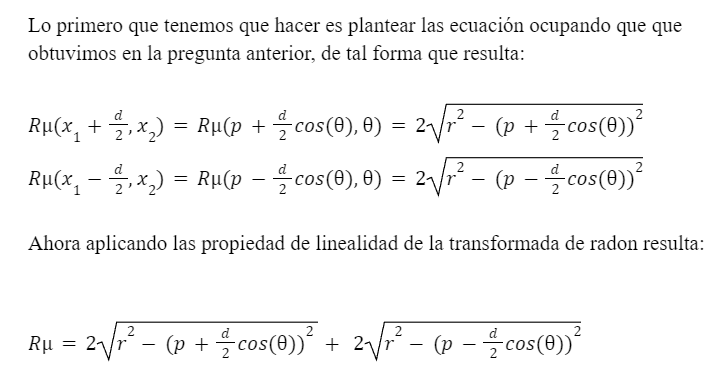

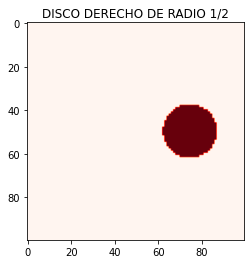

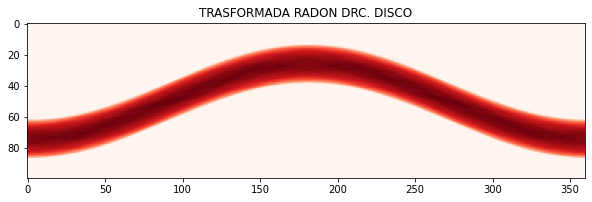

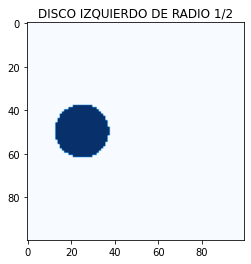

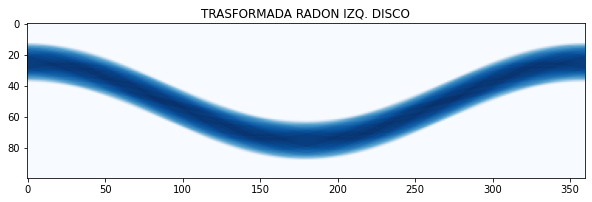

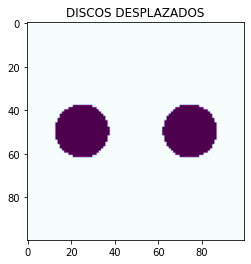

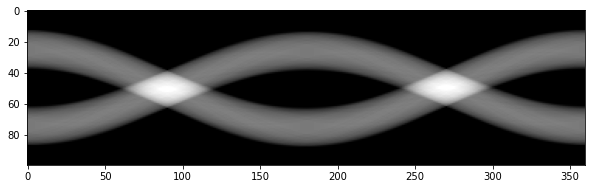

In [ ]:
#########################################################################################################################################################################################################################################################################
#analizandolo graficamente 
#########################################################################################################################################################################################################################################################################
def circulos_desplazados(x, y, r):
   return ((x - 2*r)**2 + y**2 < r**2) 
#########################################################################################################################################################################################################################################################################
#Grafico 1
#########################################################################################################################################################################################################################################################################
s1 = circulos_desplazados(xx, yy, 0.5)
plt.imshow(s1, cmap='Reds')
plt.title(f"DISCO DERECHO DE RADIO 1/2")
plt.show()
theta = np.linspace(0., 360, 360, endpoint=False)
sinogram = radon(s1, theta=theta, preserve_range=True)
plt.figure(figsize=(10,15))
plt.imshow(sinogram, cmap='Reds')
plt.title(f"TRASFORMADA RADON DRC. DISCO")
plt.show()
#########################################################################################################################################################################################################################################################################
def circulos_desplazados(x, y, r):
   return 1*((x + 2*r)**2 + y**2 < r**2)
#########################################################################################################################################################################################################################################################################
#Grafico 2
#########################################################################################################################################################################################################################################################################
s2 = circulos_desplazados(xx, yy, 0.5)
plt.imshow(s2, cmap='Blues')
plt.title(f"DISCO IZQUIERDO DE RADIO 1/2")
plt.show()
theta = np.linspace(0., 360, 360, endpoint=False)
sinogram = radon(s2, theta=theta, preserve_range=True)
plt.figure(figsize=(10,15))
plt.imshow(sinogram, cmap='Blues')
plt.title(f"TRASFORMADA RADON IZQ. DISCO")
plt.show()
#########################################################################################################################################################################################################################################################################
#Grafico 3
#########################################################################################################################################################################################################################################################################
plt.imshow(s2+s1, cmap='BuPu')
plt.title(f"DISCOS DESPLAZADOS")
plt.show()

theta = np.linspace(0., 360, 360, endpoint=False)
sinogram = radon(s2+s1, theta=theta, preserve_range=True)
plt.figure(figsize=(10,15))
plt.imshow(sinogram, cmap='gray')
#plt.title(f"TRASFORMADA DISCOS")
plt.show()
#########################################################################################################################################################################################################################################################################



#### A continuacion se presentan como son los discos, con un radio de 1/2 y una distancia de 1 entre ellos. En donde podemos notar que la superposicion maxima se de logra en 90° y 270°, lo cual es indicado con los puntos rojos, aunque se ha de notar desde los puntos en blancos se comienza a superponer las funciones.

#### Y la separacion maxima se da en 0°, 180° y 360°


###**2.2**

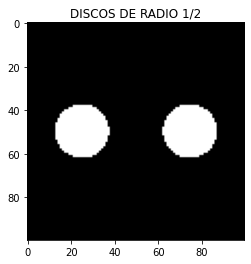

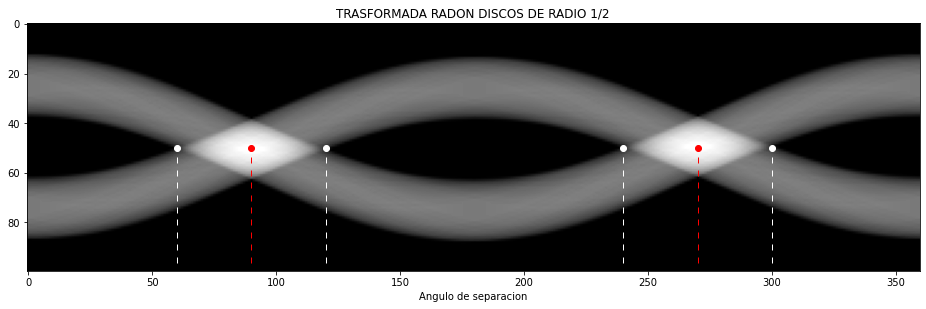

In [ ]:
#########################################################################################################################################################################################################################################################################
#Librerias
from matplotlib.colors import LinearSegmentedColormap
from skimage.transform import radon, rescale, iradon
from PIL import Image
import glob
######################################################################################################################################################################################################################################################################### 
def circulos_desplazados(x, y, r):
   return 1*((x - 2*r)**2 + y**2 < r**2) | 1*((x + 2*r)**2 + y**2 < r**2)
#########################################################################################################################################################################################################################################################################
s = circulos_desplazados(xx, yy, 0.5)
#########################################################################################################################################################################################################################################################################
#Grafico 1
#########################################################################################################################################################################################################################################################################
plt.imshow(s, cmap='gray')
plt.title(f"DISCOS DE RADIO 1/2")
plt.show()
theta = np.linspace(0., 360, 360, endpoint=False)
sinogram = radon(s, theta=theta, preserve_range=True)
plt.figure(figsize=(16,20))
plt.imshow(sinogram, cmap='gray')
#########################################################################################################################################################################################################################################################################
#GRafico Trans.Radon y Separacion
#########################################################################################################################################################################################################################################################################
plt.title(f"TRASFORMADA RADON DISCOS DE RADIO 1/2")
y=[50,50,50,50]
x=[240,120,300,60]
plt.plot(x,y, "o",color="w")
y=[95,90,85,80,75,70,65,60,55,50,95,90,85,80,75,70,65,60,55,50,95,90,85,80,75,70,65,60,55,50,95,90,85,80,75,70,65,60,55,50]
x=[240,240,240,240,240,240,240,240,240,240,120,120,120,120,120,120,120,120,120,120,60,60,60,60,60,60,60,60,60,60,300,300,300,300,300,300,300,300,300,300]
plt.plot(x,y, "|",color="w")
y=[95,90,85,80,75,70,65,60,55,50,95,90,85,80,75,70,65,60,55,50]
x=[90,90,90,90,90,90,90,90,90,90,270,270,270,270,270,270,270,270,270,270]
plt.plot(x,y, "|",color="red")
y=[50,50]
x=[90,270]
plt.plot(x,y, "o",color="red")
plt.xlabel('Angulo de separacion')
plt.show()
#########################################################################################################################################################################################################################################################################



###**2.3**

####Como podemos ver a continuacion la minima distancia para que los 2 circulos se puedan distinguir en el penultimo (espaciado 2r) grafico en donde el punto de declive de la funcion es a lo menos 2 veces mejor a los maximos de la funcion.

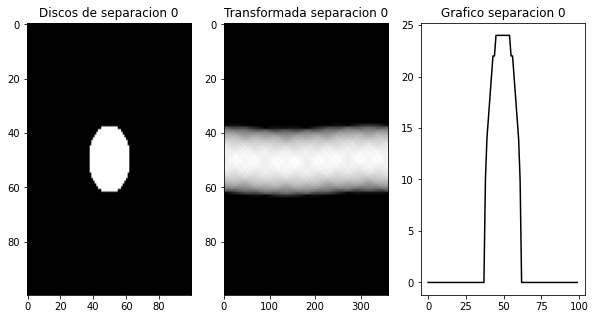

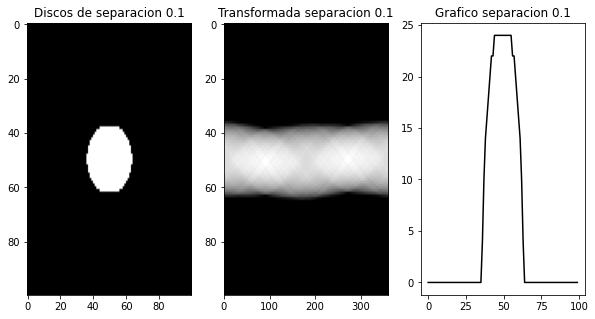

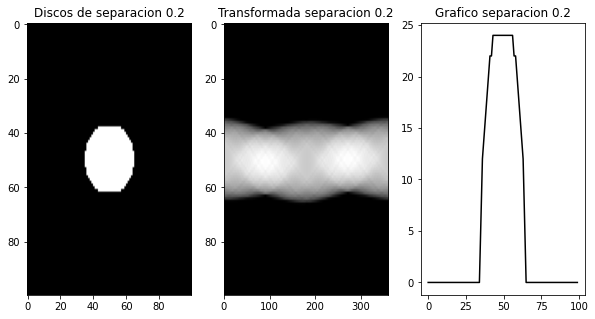

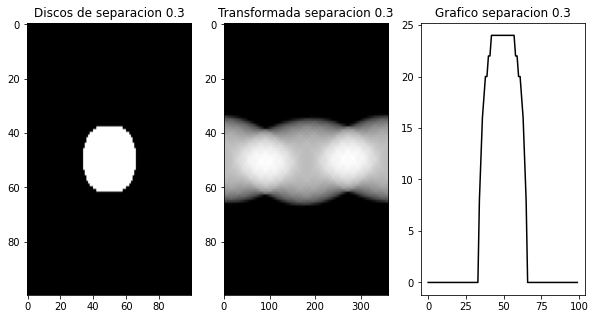

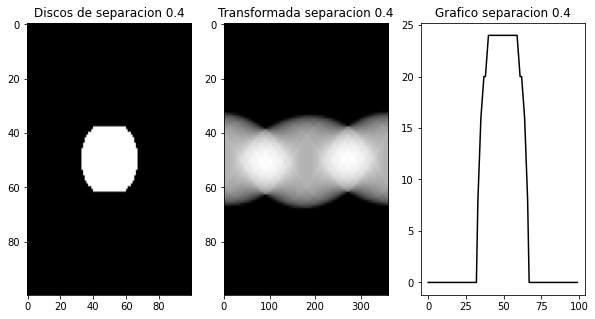

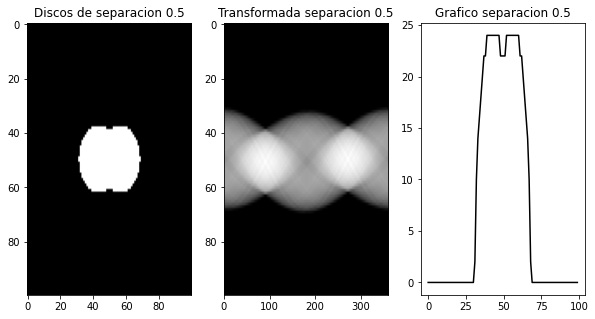

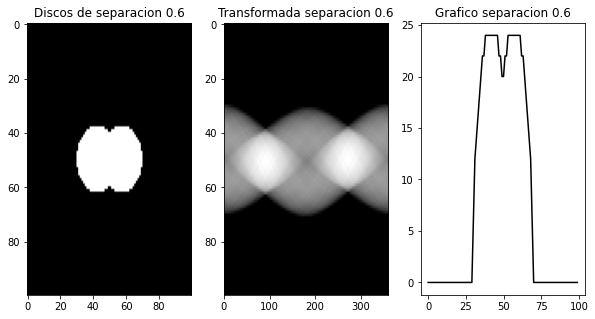

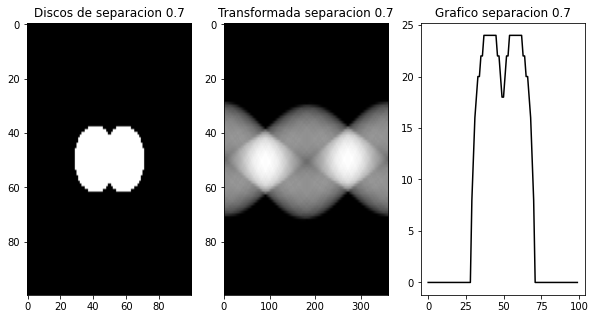

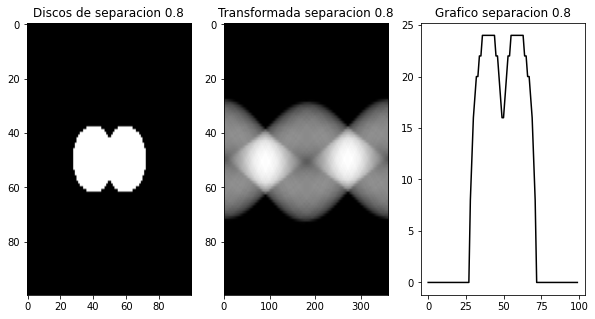

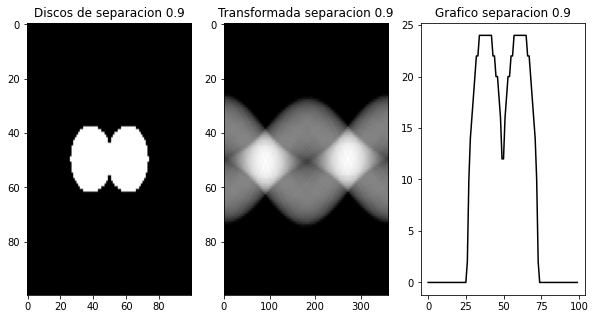

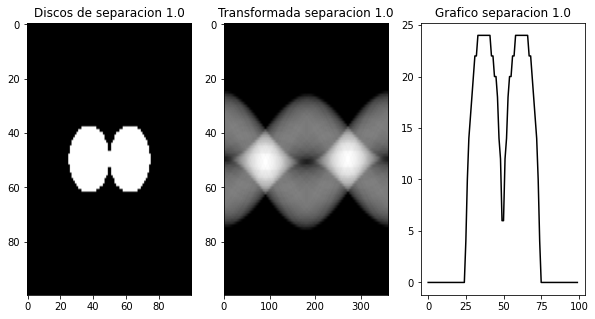

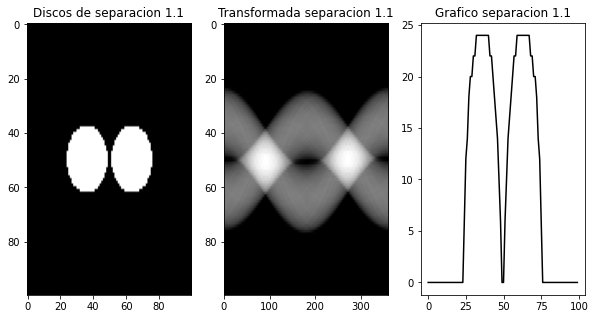

In [ ]:
i=0
def circulos_desplazados(x, y, r,d):
   return 1*((x - d/2)**2 + y**2 < r**2) | 1*((x + d/2)**2 + y**2 < r**2)
while i<1.15:


  s = circulos_desplazados(xx, yy, 0.5 ,i)
  plt.figure(figsize=(10,5))
  plt.subplot(1, 3, 1)
  plt.imshow(s, cmap='gray',aspect="auto")
  plt.title(f"Discos de separacion {round(i,3)}")
  plt.subplot(1, 3, 2)
  theta = np.linspace(0., 360, 360, endpoint=False)
  sinogram = radon(s, theta=theta, preserve_range=True)
  plt.title(f"Transformada separacion {round(i,3)}")
  plt.imshow(sinogram, cmap='gray',aspect="auto")
  plt.subplot(1, 3, 3)
  plt.title(f"Grafico separacion {round(i,3)}")
  plt.plot(sinogram[:,0],color="black")
  plt.show()
  i+=0.10

###**2.4**

#### Es mediante el sigueinte codigo que podemos crear el gif que se ve al final del kernel.

In [ ]:
#########################################################################################################################################################################################################################################################################
def circulos_desplazados(x, y, r):
   return 1*((x - 2*r)**2 + y**2 < r**2) | 1*((x + 2*r)**2 + y**2 < r**2)
s = circulos_desplazados(xx, yy, 0.5)
lista_graf=[]
i=0#angulo de inicio 
#########################################################################################################################################################################################################################################################################
#creo lo fps
#########################################################################################################################################################################################################################################################################
while i<360:
  theta = np.linspace(0., i, 360, endpoint=False)
  sinogram = radon(s, theta=theta, preserve_range=True)
  plt.figure(figsize=(5,5))
  plt.title(f"TRASFORMADA INVERSA DE RADON ANGULO {i}°")
  plt.imshow(iradon(sinogram), cmap='gray')
  plt.savefig(f"Circulos angulo {i}.jpg")
  lista_graf.append(f"Circulos angulo {i}.jpg")
  plt.show()
  i+=5
#########################################################################################################################################################################################################################################################################
frames = []
imgs = lista_graf
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
#########################################################################################################################################################################################################################################################################
#creo el gif 
#########################################################################################################################################################################################################################################################################
frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)


Output hidden; open in https://colab.research.google.com to view.

#### Lo que apreciamos en este archivo es la tranformadas inversas de radon para distintos angulos de "thetha" como podemos ver desde los angulos 90°-175° se esta generando un sub-muestreo de la señal por lo cual se nos produce el fenomeno de aliassing. En contraposicion, los angulos de 185°-360° generan un sobre.muestreo de la señal por lo cual a igual que con el caso anterior se genera aliassing en nuestra señal. El caso optimo es cueando ocupamos un muestreo de 180° , cabe mensionar que se puede detectar desde un angulo menor a 180 que estamos trabajando con 2 circulos , aproximadamente 140°, esto se debe a que el analisis es un factor de merito.


**↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓NO PRESIONAR↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓**





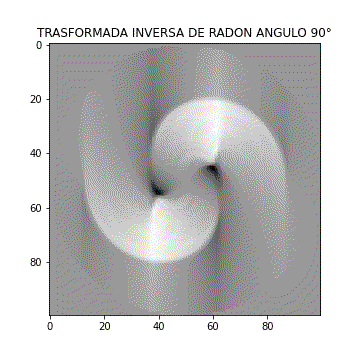

###2.5

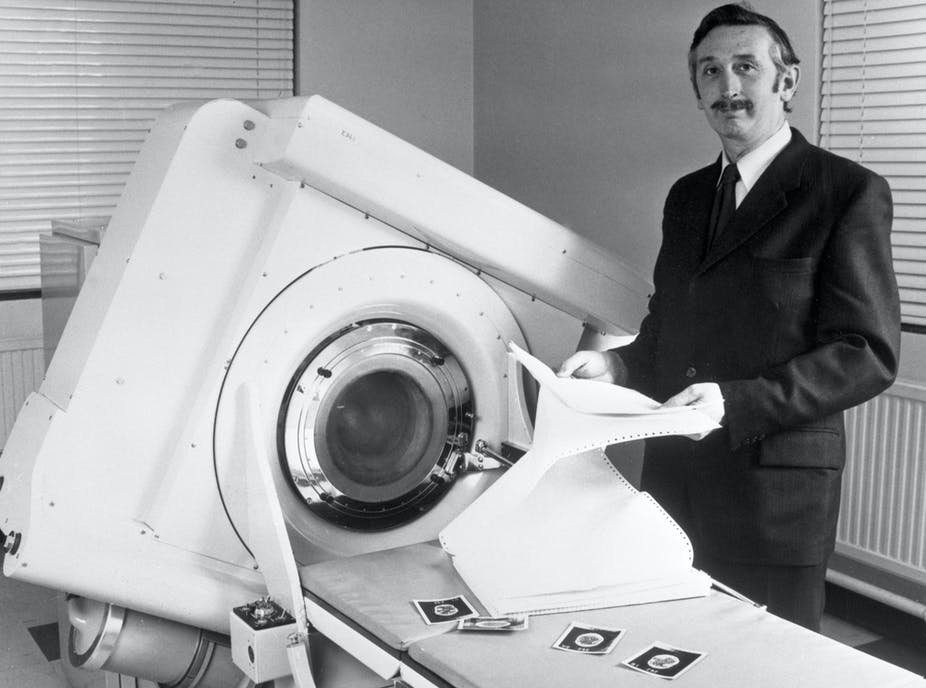

#### La diferencia entre el metodo matematico y el practico en en nuestro sistema no consideramos el factor de radiacion, es por esto que el valor de p siempre va a ser el punto mas optimo a una radiacion fijada, por lo general siempre se intenta que el pasiente este lo mas cerca posible del resonador para asi poder obtener imagenes mas claras sin la necesidad de ocupar cantidades altisimas de radiacion lo cual pueden generar quemaduras en el paciente. Pero un parametro que si conocemos es la tasa de muestreo la cual debe ser a lo menos 360° para poder tener un analisis sin aliassing por sub-muestreo de la señal 

####Cabe mencionar que el parametro de radiacion varia dependiendo del tejido que se busca analizar

## **➼ Codigo Preguna N°3**

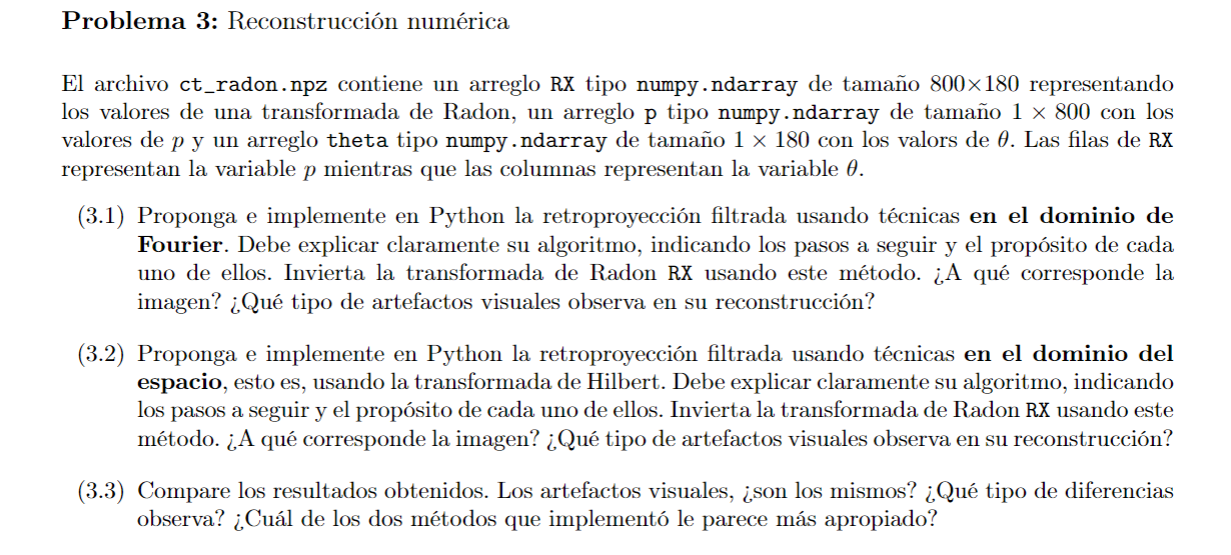

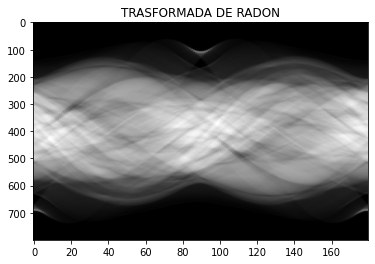

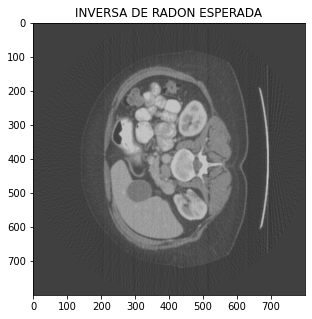

In [ ]:
#########################################################################################################################################################################################################################################################################
datos=load('ct_radon.npz', allow_pickle=True)
#########################################################################################################################################################################################################################################################################
#Grafico Trans.Radon
#########################################################################################################################################################################################################################################################################
rx=datos["RX"]
plt.title(f"TRASFORMADA DE RADON")
plt.imshow(rx,cmap="gray",aspect="auto")
plt.show()
#########################################################################################################################################################################################################################################################################
#Grafico imagen
#########################################################################################################################################################################################################################################################################
Theta=datos["theta"]*180/np.pi
p=datos["p"]
plt.figure(figsize=(5, 5))
sinogram = iradon(rx, theta=Theta, preserve_range=True)
plt.title(f"INVERSA DE RADON ESPERADA")
plt.imshow(sinogram,cmap="gray")
plt.show()

###**3.1**

#### La tecnica que se ocupa es que en el dominio de Fourier la convolucion se vuelve una multiplicacion, de esta manera se simplifica muchisimo mas el procedimiento dado a que el problema se resume en multiplicar Rx en Fourier por nuestro filtro (h=rampa). Posterior a la multiplicacion se devuelve al dominio del tiempo mediante la tranformada inversa de Fourier, este proceso se conoce como retro proyeccion filtada), es gracias a esto que logramos recontruir la imagen como se ve en el codigo de acontinuacion, caba mencionar que todos los artefactos presentes son faciles de eliminar mediante distintos filtros.


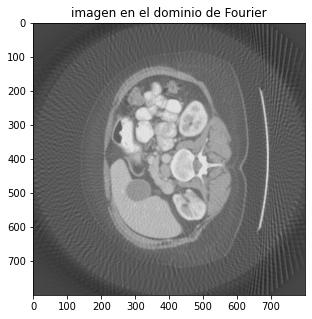

In [ ]:
#########################################################################################################################################################################################################################################################################
#funciones numpy 
#########################################################################################################################################################################################################################################################################
fft = lambda x: np.fft.fftshift(np.fft.fft(np.fft.ifftshift(x)))
ifft = lambda x: np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(x)))
#########################################################################################################################################################################################################################################################################
N = 800
r = np.linspace(-1, 1, N)
h = np.abs(r)
#########################################################################################################################################################################################################################################################################
def single_filtered_back_projection_fourier(rdn, alpha_idx):
    proj = np.real(ifft(fft(rdn[:, alpha_idx]) * h))
    proj = np.tile(proj[:, np.newaxis], (1, rdn.shape[0]))
    return rotate(proj, 90 + alpha_idx / rdn.shape[1] * 360)

def filtered_back_projection_fourier(rdn, n_alphas=-1):
    if n_alphas <= 0:
        n_alphas = rdn.shape[1]

    res = np.zeros((rdn.shape[0], rdn.shape[0]))
    for i in range(n_alphas):
        res += single_filtered_back_projection_fourier(rdn, i)
    return res / np.max(res)
#########################################################################################################################################################################################################################################################################
#Grafico imagen
#########################################################################################################################################################################################################################################################################
plt.figure(figsize=(5, 5))
plt.imshow(filtered_back_projection_fourier(rx),cmap="binary_r")
plt.title('imagen en el dominio de Fourier')
plt.show()


###Al recontruir la imagen podemos notar que es un TAC de abdomen a la altura de los riñones y higado. Los artefactos que podemos apreciar son lineas verticales que atraviesan toda al imagen generando una distorcion parcial de esta. Ademas podemos apreciar un circulo centrado en (400,400) cual cubre a toda la muestra .

###**3.2**

#### La tecnica que se ocupa es que en Hilbert a diferencia de fourier no es un cambio de dominio sino que operamos sobre la derivada de la funcion con la finalidad de poder destacar las curvas, una vez realizada la derivacion del sistema y la aplicacion de los filtros necesarios se procede a aplicar la funcion de hilbert(integrar) para posteriormente tomar los valores imaginarios de la proyeccion y graficarla. 

####En conclucion tanto la transformada de hilbert como la transformada de fourier solo que una opera sobre el espacio de fourier mientras que la otra opera sobre la derivada del sistema. Esto se debe a que una es un metetodo por convolucion mientras que la otra un metodo algebraico o directo

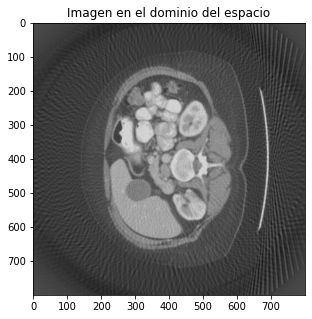

In [ ]:
#########################################################################################################################################################################################################################################################################
#funciones
########################################################################################################################################################################################################################################################################
def single_filtered_back_projection_hilbert(rdn, alpha_idx):
    proj = np.imag(hilbert(rdn[:, alpha_idx]))
    proj = np.tile(proj[:, np.newaxis], (1, rdn.shape[0]))
    return rotate(proj, 90 + alpha_idx / np.asarray(rdn).shape[1]* 360)
    
def filtered_back_projection_hilbert(rdn, n_alphas=-1):
    if n_alphas <= 0:
        n_alphas = np.asarray(rdn).shape[1]
    res = np.zeros((np.asarray(rdn).shape[0], np.asarray(rdn).shape[0]))
    for i in range(n_alphas):
        res += single_filtered_back_projection_hilbert(rdn, i)

    return res /np.max(res)

#########################################################################################################################################################################################################################################################################
#Grafico imagen
#########################################################################################################################################################################################################################################################################
drx=[]
rx_dv= rx.copy()
for i in range(800):
  rx_dv[i]=((rx[i]-rx[i-1])/(p[i]-p[i-2]))*1/(2*np.pi)
#########################################################################################################################################################################################################################################################################
plt.figure(figsize=(5, 5))
plt.imshow(filtered_back_projection_hilbert(rx_dv),cmap="binary_r")
plt.title('Imagen en el dominio del espacio')
plt.show()
#########################################################################################################################################################################################################################################################################



###Al recontruir la imagen podemos notar que es un TAC de abdomen a la altura de los riñones y higado. Los artefactos que podemos apreciar son lineas verticales que atraviesan toda al imagen generando una distorcion parcial de esta. Ademas podemos apreciar un circulo centrado en (400,400) cual cubre a toda la muestra .

####Cabe mencionar que a diferencia del metodo pasado los artefactos de esta imagen posee una intencidad mucho mas debil con respecto a los valores de la muestra.


#### **EXTRA FILTRO DE CONTORNOS**

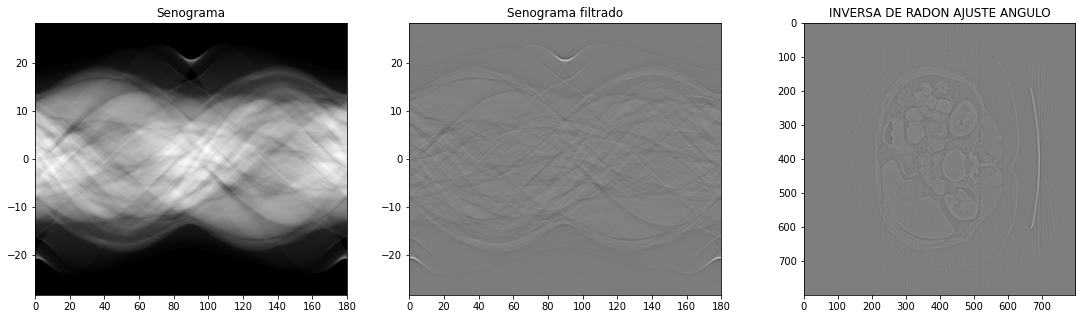

In [ ]:
#########################################################################################################################################################################################################################################################################
#funciones numpy
#########################################################################################################################################################################################################################################################################
fft = lambda x: np.fft.fftshift(np.fft.fft(np.fft.ifftshift(x)))
ifft = lambda x: np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(x)))
#########################################################################################################################################################################################################################################################################
#parametros
#########################################################################################################################################################################################################################################################################
r = np.linspace(-2, 2, N)
h = np.abs(r) 
rx_filtrada = rx.copy()
for i in range(rx_filtrada.shape[1]):
    rx_filtrada[:, i] = np.real(ifft(fft(rx[:, i]) * h))

#########################################################################################################################################################################################################################################################################
#grafico
#########################################################################################################################################################################################################################################################################
plt.figure(figsize=(19,5))
plt.subplot(1, 3, 1)
plt.imshow(rx, extent=[0, 180, -np.sqrt(N), np.sqrt(N)], aspect='auto',cmap="binary_r"); plt.grid(False)
plt.title('Senograma')
plt.subplot(1, 3, 2)
plt.imshow(rx_filtrada, extent=[0, 180, -np.sqrt(N), np.sqrt(N)], aspect='auto',cmap="binary_r"); plt.grid(False)
plt.title('Senograma filtrado')
plt.subplot(1, 3, 3)
Theta=datos["theta"]*180/np.pi
p=datos["p"]
sinogram = iradon(rx_filtrada, theta=Theta, preserve_range=True)
plt.title(f"INVERSA DE RADON AJUSTE ANGULO")
plt.imshow(sinogram,cmap='gist_gray')

plt.show()

###**3.3**

#### Como podemos observar en las imagenes de acontinuacion al aplicar la recontrucion mediante Fourier se generan artefactos tranversales y un circulo los cuales afectan parcialmente a la imagen dado que a pesar de esto la resolucion y el detalle que esta nos brinda es de bastante calidad. En cambio al aplicar la recontrucion mediante Hilbert podemos ver que se genera una imagen sin artefactos tan notorios pero si con una reducion en el contraste de la imagen, generando este efecto de "suavizado o atenuacion".

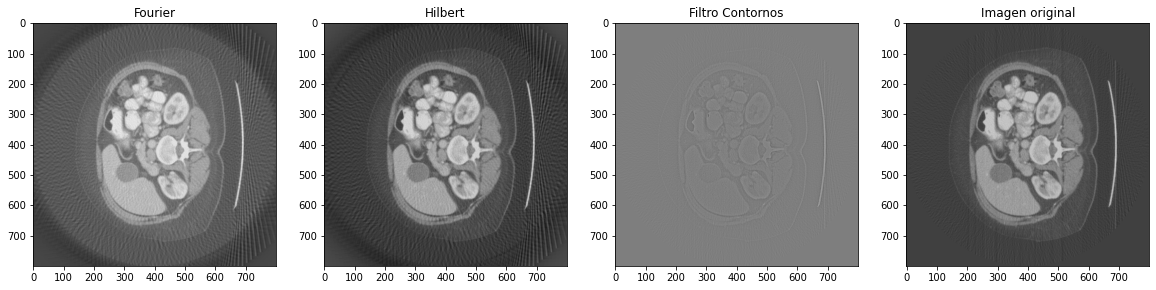

In [ ]:
#########################################################################################################################################################################################################################################################################
#Imagen compuesta
plt.figure(figsize=(20,10))
#########################################################################################################################################################################################################################################################################
#imagen 1
#########################################################################################################################################################################################################################################################################
#imagen 2
#########################################################################################################################################################################################################################################################################
plt.subplot(1, 4, 1)
plt.imshow(filtered_back_projection_fourier(rx),cmap="gray")
plt.title('Fourier')
plt.subplot(1, 4, 2)
plt.imshow(filtered_back_projection_hilbert(rx_dv),cmap="gray")
plt.title('Hilbert')
#########################################################################################################################################################################################################################################################################
#imagen 3
#########################################################################################################################################################################################################################################################################
plt.subplot(1, 4, 3)
sinogram = iradon(rx_filtrada, theta=Theta, preserve_range=True)
plt.title(f"Filtro Contornos")
plt.imshow(sinogram,cmap='gist_gray')
#########################################################################################################################################################################################################################################################################
#imagen 4
#########################################################################################################################################################################################################################################################################
plt.subplot(1, 4, 4)
sinogram = iradon(rx, theta=Theta, preserve_range=True)
plt.title(f"Imagen original")
plt.imshow(sinogram,cmap="gray")
plt.show()

#########################################################################################################################################################################################################################################################################


#### El metodo que a mi parecer es mas conveniente va a depender del tegido a analizar, si se desean analizar tejidos blandos podemos notar que fourier es lo mas produnte pero si se desea analizar cuespoes mas densos hilbert es lo mas adecuado. Esta diferencia la podemos apreciar de manera grafica si centramos nuestra vista en la parte superior del colon.

#### Aunque cabe mencionar que Fourier es mas facil agregarle filtros a la funcion dado a que se reducen a una simple multiplicacion.

#### Al final para motivos practicos resulta mas conveniente ocupar  una mezcla de ambas funciones





















* Bibliografia : Ayudantia N4 IBM2101 2021 https://cdn.discordapp.com/attachments/780299872393232434/1025528363802165258/Ayudantia_4.html 

* *(el link dice discord porque fue la unica forma en la que se me ocurrio para poder poner un arquivo html en el codigo)*

* pregunta 1 : https://usermanual.wiki/Document/Medical20Imaging20Signals20and20Systems20Solutions20Manual.1755916689/view